<a href="https://colab.research.google.com/github/i-SanMartin/FastAI/blob/main/NN_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
!pip install -Uqq fastbook
import fastbook

     |████████████████████████████████| 727kB 5.2MB/s 
     |████████████████████████████████| 1.2MB 8.1MB/s 
     |████████████████████████████████| 194kB 17.7MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 12.8MB 309kB/s 
     |████████████████████████████████| 776.8MB 13kB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [ ]:
import torch
from fastai.vision.all import *
from fastbook import *

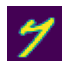

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()
(path/'train').ls()
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_sevens = torch.stack(seven_tensors[0: 600]).float()/255
stacked_threes = torch.stack(three_tensors[0: 600]).float()/255
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([3]*600 + [7]*600).unsqueeze(1)
show_image(stacked_sevens[1]*255)

In [ ]:
class Net:
  cats = []
  lys = []
  biases = []
  def __init__(self, arch, input_size, cates):
    self.cats = cates
    #Clear weights and bias
    self.lys.clear()
    self.biases.clear()

    _ly = 0#Save previous layer
 
    for i, ly in enumerate(arch) :
      if i == 0:
        self.lys.append(torch.rand(ly, input_size) - 0.5)
      else:
        self.lys.append(torch.rand(ly, _ly) - 0.5)

      self.biases.append(torch.rand(ly) - 0.5)
      _ly = ly
    

  def predict(self, input_data):
    
    output = torch.tensor(input_data)
    for ly, bias in zip(self.lys, self.biases):
      output = torch.sigmoid(output @ ly.T +bias)
    return output

  def loss_f(self, out, train_labels): return torch.sqrt(torch.square(1 - out[self.cats.index(train_labels)])) #Tiene que tener tantas neuronas de salida como categorias

  def train(self, train_data, train_labels):
    out = self.predict(train_data)
    for ly in reversed(self.lys):
      ly.requires_grad_()
      yt = self.loss_f(out, train_data, train_labels)
      yt.backward()
      



In [ ]:
architecture = [8, 6, 4, 2]
net = Net(architecture, 2, ["3", "7"])
net.lys, net.biases

([tensor([[ 0.0782, -0.4400],
          [-0.2154, -0.2993],
          [ 0.0014, -0.1861],
          [-0.0346, -0.3388],
          [-0.3432, -0.2917],
          [-0.1711, -0.3946],
          [ 0.4192, -0.0992],
          [ 0.4302,  0.1558]]),
  tensor([[ 0.1947, -0.4103,  0.3712, -0.3670, -0.0863,  0.1044,  0.2581,  0.4037],
          [ 0.4555, -0.3965,  0.1258, -0.2151, -0.0548, -0.3742,  0.4554, -0.3670],
          [ 0.2672,  0.1757,  0.1625, -0.2703,  0.4545,  0.1099,  0.0643, -0.4406],
          [ 0.2099, -0.0750, -0.2291,  0.4295,  0.1115, -0.2766, -0.2531, -0.0239],
          [ 0.2792, -0.1278, -0.2853, -0.1712, -0.3735,  0.1783,  0.3870, -0.4707],
          [ 0.1161,  0.2583,  0.0907, -0.1781,  0.2610,  0.2628,  0.1870, -0.0879]]),
  tensor([[-0.0495, -0.1119,  0.0073, -0.0299,  0.1202,  0.1401],
          [-0.4541, -0.1845,  0.4211,  0.1948, -0.0249, -0.3015],
          [-0.3059, -0.4479, -0.1630,  0.1689,  0.3188,  0.2308],
          [-0.4420, -0.3007, -0.0789,  0.4837,  0.0723

In [ ]:
res = net.predict([2., 3.])
res

tensor([0.3549, 0.5649])

In [ ]:
net.loss_f(res, "3")

tensor(0.6451)

In [ ]:
net.train(train_x,train_y)